# Plot cpdb results
# 5 Apr 2022 Chenqu

In [1]:
import numpy as np
import scipy as sp
import scanpy as sc
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import rc
from matplotlib import colors
import seaborn as sb
from itertools import compress
import random
import joblib as jl
import matplotlib.patches as mpatches
import os as os

sc.settings.set_figure_params(dpi = 160, color_map = 'RdYlBu_r', dpi_save = 300, format = 'pdf')
plt.rcParams["figure.figsize"] = [6,6]
#plt.rcParams['font.sans-serif']=['Arial']
#rc('font', **{'family':'sans-serif', 'sans-serif':['Arial']})
#plt.rcParams['pdf.fonttype'] = 'truetype'

In [2]:
sb.set_palette('tab10')

In [4]:
# import utils (in github folder src/utils/)
import sys
sys.path.append('/home/jovyan/Pan_fetal_immune/src/utils/')
from array_operations import *
from colors import *

In [5]:
organ_order = ['YS','LI','BM','TH','SP','MLN','SK','GU','KI']

In [6]:
# set working directory
%cd /home/jovyan/panfetal/

/home/jovyan/panfetal


In [7]:
# figure directory
fig_path = '/home/jovyan/mount/gdrive/Pan_fetal/plots_output/chenqu_jhub/'
sc.settings.figdir = fig_path

# Dot plot with means and pvals (results from B_progenitor_spatial_cpdb_paper_v6.R)

In [18]:
means = pd.read_csv('csv/B_prog_cpdb_means_filtered.csv')
pval = pd.read_csv('csv/B_prog_cpdb_pvals_filtered.csv')

In [19]:
means

,ligand_pair,LI-CYCLING_NK,LI-ILC3,LI-MACROPHAGE_LYVE1_HIGH,LI-NK,LI-TYPE_1_INNATE_T,SP-CYCLING_NK,SP-ILC3,SP-MACROPHAGE_LYVE1_HIGH,SP-NK,SP-TYPE_1_INNATE_T,TH-CYCLING_NK,TH-ILC3,TH-MACROPHAGE_LYVE1_HIGH,TH-NK,TH-TYPE_1_INNATE_T
0,CD74_MIF,4.9200,4.7030,4.3590,4.4150,4.6104,5.0056,4.6538,4.5528,4.4970,4.8298,5.1232,4.7260,4.5624,4.6084,4.6588
1,MIF_CD74,2.3142,2.7076,3.5372,2.2972,2.4388,2.6978,2.9512,3.9420,2.3040,2.6562,2.5442,2.7322,4.2566,2.6652,2.8460
2,RPS19_C5AR1,3.0578,3.0634,3.9648,3.0588,3.0714,3.0376,3.0376,3.6718,3.0358,3.0376,0.0000,0.0000,4.0542,0.0000,3.0048
3,CLEC2D_KLRB1,3.2056,3.0688,0.8738,3.7658,2.9308,3.0936,3.1846,1.0730,3.7216,2.5450,2.5826,2.9718,0.8690,3.5104,2.4172
4,CD74_COPA,3.4230,3.3460,3.6360,3.3000,3.3480,3.4760,3.3398,3.6178,3.3024,3.3730,3.2414,3.2288,3.3038,3.2034,3.2842
5,HLA-E_KLRC1,3.5108,2.7094,1.6154,3.4878,2.3732,3.2766,2.5806,1.6682,3.3390,2.0642,3.0500,2.8824,1.6462,3.5538,1.8792
6,CD74_APP,3.2500,3.5170,3.2270,3.1638,3.2250,3.3034,3.4680,3.2910,3.1860,3.2768,3.2084,3.4070,3.0710,3.0488,3.1790
7,HLA-E_CD94:NKG2A,3.0308,1.6236,1.6056,3.1974,2.3732,3.1710,1.6716,1.6652,3.2596,2.0642,2.8104,1.6674,1.6452,3.3522,1.8792
8,APP_CD74,1.4374,1.8310,2.6604,1.4204,1.5622,1.7854,2.0388,3.0298,1.3918,1.7438,1.5224,1.7104,3.2344,1.6434,1.8242
9,COPA_CD74,1.3130,1.7064,2.5360,1.2962,1.4374,1.7140,1.9674,2.9584,1.3204,1.6724,1.4222,1.6102,3.1344,1.5432,1.7242


In [20]:
# rearrange column order
means = means.iloc[:,[0,1,6,11,2,7,12,3,8,13,4,9,14,5,10,15]]
pval = pval.iloc[:,[0,1,6,11,2,7,12,3,8,13,4,9,14,5,10,15]]

In [21]:
# order gene pairs by dendrogram
tmp = means.copy()
#tmp.index = tmp['ligand_pair']
tmp = tmp.drop(['ligand_pair'], 1)

## Cluster genes
from scipy.cluster.hierarchy import ward, dendrogram, leaves_list
clustering = ward(tmp.values)
ordered_index = tmp.index[leaves_list(clustering)].tolist()
# X_pl_df = X_pl_df[ordered_genes + ['n_cells', 'organ', 'age_bins'] ]
ordered_index = np.array(ordered_index)

In [22]:
means = means.iloc[ordered_index,:]
pval = pval.iloc[ordered_index,:]
ordered_genes = np.array(means['ligand_pair'])

In [23]:
df_means = pd.melt(means, id_vars='ligand_pair',value_name='means', ignore_index=True)
df_pval = pd.melt(pval, id_vars='ligand_pair',value_name='pval', ignore_index=True)

In [24]:
df_plot = pd.merge(left = df_means, right=df_pval)

In [25]:
df_plot['organ']=[name.split('-')[0] for name in df_plot['variable']]
df_plot['ct']=[name.split('-')[1] for name in df_plot['variable']]
df_plot['logpval']=-np.log(df_plot['pval']+1e-5)

In [26]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


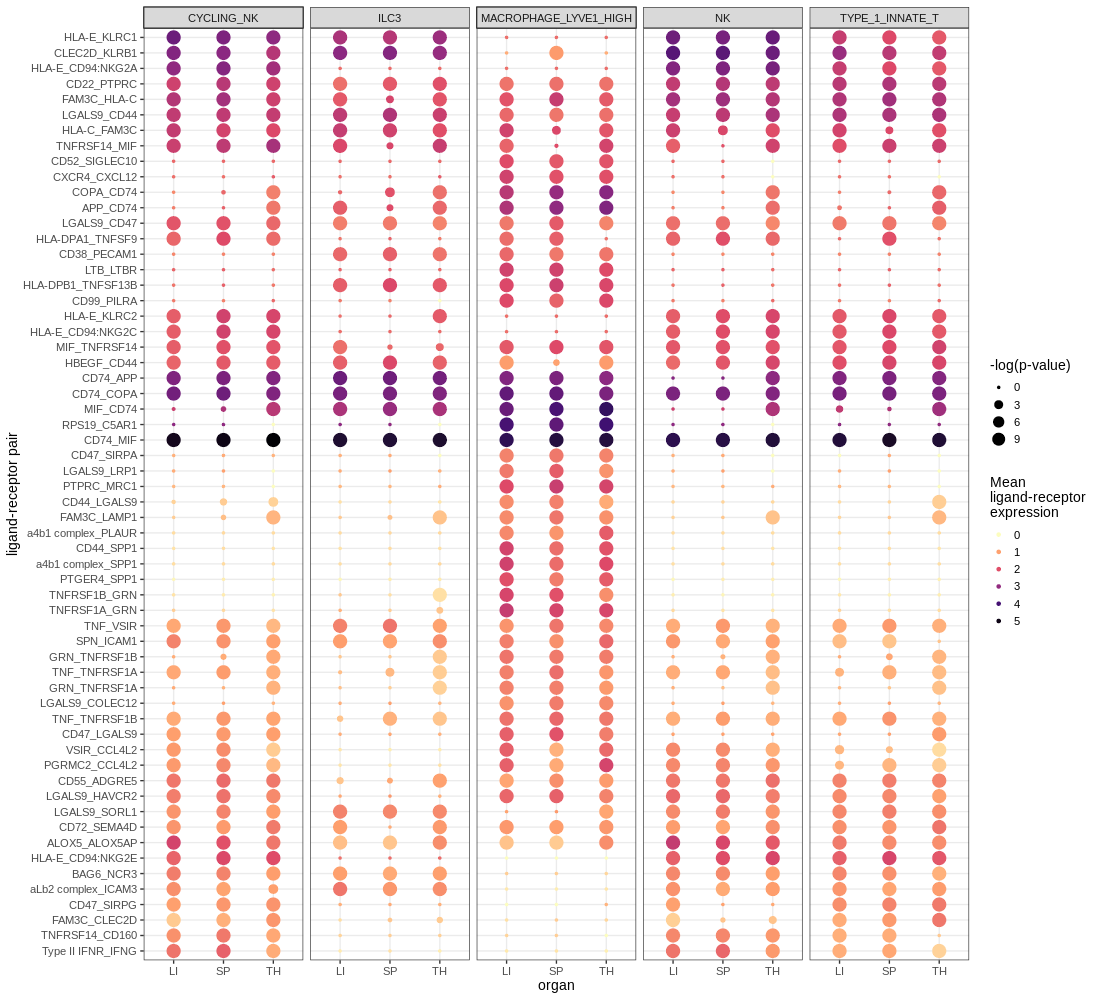

In [32]:
%%R -i df_plot -i ordered_genes -w 1100 -h 1000
library("dplyr") 
library('tidyr')
library('tidyverse')
library("ggplot2") 

df_plot %>%
    mutate(ligand_pair=factor(ligand_pair, levels=ordered_genes)) %>%
    ggplot(aes(organ, ligand_pair, color=means, size=logpval)) +
    geom_point() +
    facet_grid(.~ct) +
    scale_color_viridis_c(option='magma', direction=-1, name="Mean\nligand-receptor\nexpression", guide = "legend") +
    scale_size(name='-log(p-value)') +
    ylab("ligand-receptor pair") +
    theme_bw(base_size=14)+
    ggsave('/home/jovyan/mount/gdrive/Pan_fetal/plots_output/chenqu_jhub/B_prog_cpdb_plot.pdf', width=15, height=14)